# By Mohammad Zayd
### LinkedIn: www.linkedin.com/in/md-zayd
### GitHub: www.github.com/Zayd1602

In [ ]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


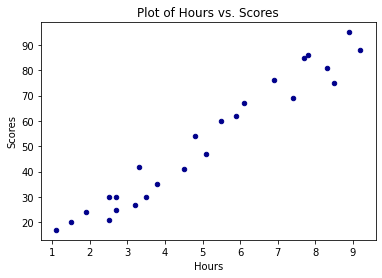

In [ ]:
df.plot(kind='scatter', x='Hours', y='Scores', color='darkblue')
plt.title('Plot of Hours vs. Scores')
plt.show()

In [ ]:
#dividing the data into sets
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [ ]:
#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20, 1) (20,)
Test set: (5, 1) (5,)


In [ ]:
#train the model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

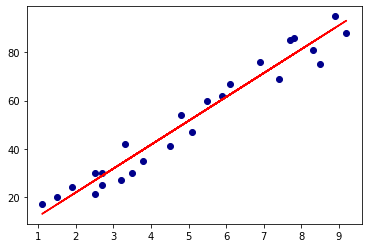

In [ ]:
#plot the regression line
line = regr.coef_*X+regr.intercept_
plt.scatter(X,y,color='darkblue')
plt.plot(X,line,'-r')
plt.show()

In [ ]:
#predict the scores for test data
yhat = regr.predict(X_test)
yhat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
#comparing the actual scores vs. predicted scores
df1 = pd.DataFrame({'Actual-Scores':y_test, 'Predicted-Scores':yhat})
df1

,Actual-Scores,Predicted-Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#What will be the predicted score if a student studies for 9.25 hrs/day?
hrs = np.array(9.25)
hrs = hrs.reshape(-1, 1)
pred = regr.predict(hrs)
print("No. of Hours Studied = {}".format(hrs[0][0]))
print("Predicted Score = {}".format(pred[0]))

No. of Hours Studied = 9.25
Predicted Score = 93.69173248737539


In [ ]:
#Mean Absolute error
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, yhat))

Mean absolute error: 4.18


In [ ]:
#Residual Sum of Squares
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - yhat) ** 2))

Residual sum of squares (MSE): 21.60


In [ ]:
#R2-score
print("R2-score: %.2f" % r2_score(y_test, yhat) )

R2-score: 0.95
